<ins>Instructions</ins>  
1. Train a KNN on the titanic dataset with k from 1 to 267 (using for+function), then graph the accuracy for each k and choose the peak value.<br><br>

2. Train a SVM on the titanic dataset with the following 5 combinations (using for+function):  
   {DV: Survived, IDV: Remaining columns}  
   {DV: Gender, IDV: Remaining columns}  
   {DV: Embarked, IDV: Remaining columns}  
   {DV: Parch, IDV: Remaining columns}  
   {DV: Sib, IDV: Remaining columns}  
   Which combination is the most accurate?

## 1. KNN

### Import dataset

In [1]:
import pandas as pd

df = pd.read_csv('../Day 24/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Drop features we don't care about
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

# Handle missing values
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df.dropna(inplace=True)

# Handle categorical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for var in ['Sex', 'Embarked']:
    df[var] = encoder.fit_transform(df[var])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Train model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt

In [4]:
scores = []
k_list = range(1,267)

for k in k_list:

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('Pclass', axis=1), df['Pclass'], test_size=0.3, random_state=0)

    # Train model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

Text(0, 0.5, 'Accuracy')

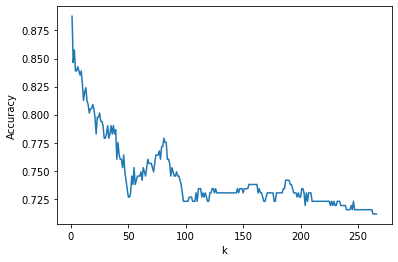

In [5]:
plt.plot(k_list, scores)
plt.xlabel("k")
plt.ylabel("Accuracy")

In [6]:
scores[:5]

[0.8876404494382022,
 0.846441947565543,
 0.8576779026217228,
 0.8389513108614233,
 0.8389513108614233]

## 2. SVM

In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [8]:
def train_model(y_var):

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(y_var, axis=1), df[y_var], test_size=0.3, random_state=0)

    # Train
    clf = svm.SVC(gamma=0.01, C=100)
    clf.fit(X_train, y_train)

    # Evaluate
    return accuracy_score(y_test, clf.predict(X_test), normalize=True)

df_scores = pd.DataFrame(data=[], columns=['Feature', 'Accuracy'])
features  = ['Survived', 'Sex', 'Embarked', 'Parch', 'SibSp']

for y_var in features:
    df_scores.loc[len(df_scores)] = [y_var, train_model(y_var)]

df_scores.sort_values(by=['Accuracy'], ascending=False)

,Feature,Accuracy
3,Parch,0.794007
2,Embarked,0.756554
4,SibSp,0.752809
0,Survived,0.745318
1,Sex,0.730337
